In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Data/Cleaner/MVP/CanRate.csv').drop('Unnamed: 0',1)

In [3]:
df.head()

,Sex,Age,C Fips,Race,Year,Count,Population,Rate
0,1,0,1,1,2000,44,146074,0.000301
1,1,0,1,1,2001,55,146259,0.000376
2,1,0,1,1,2002,63,143446,0.000439
3,1,0,1,1,2003,41,140314,0.000292
4,1,0,1,1,2004,60,137546,0.000436


In [39]:
max(df['Rate'])

1.0

In [43]:
df[df['Rate'] == 1]

,Sex,Age,C Fips,Race,Year,Count,Population,Rate
5487,1,2,91,2,2007,1,1,1.0
11740,2,2,105,2,2009,1,1,1.0


In [40]:
min(df['Population'])

1

In [42]:
df[df['Population'] == 1]

,Sex,Age,C Fips,Race,Year,Count,Population,Rate
5487,1,2,91,2,2007,1,1,1.0
11740,2,2,105,2,2009,1,1,1.0


In [4]:
d = pd.read_csv('Data/Cleaner/Cancer.csv').drop('Unnamed: 0',1)

/Users/d/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (46,47,64,70,71,97,98,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
d.shape

(2493749, 110)

In [10]:
for x in d.columns:
    print(x)

Sex
Age at diagnosis
Sequence Number—Central
Month of diagnosis
Year of diagnosis
Primary Site
Laterality
Histology (92-00) ICD-O-2
Behavior (92-00) ICD-O-2
HISTOLOGIC TYPE ICD-O-3
BEHAVIOR CODE ICD-O-3
Grade
Diagnostic Confirmation
Type of Reporting Source
EOD—Tumor Size
EOD—Extension
EOD—Extension Prost Path
EOD—Lymph Node Involv
Regional Nodes Positive
Regional Nodes Examined
Tumor Marker 1
Tumor Marker 2
Tumor Marker 3
CS Tumor Size
CS Extension
CS Lymph Nodes
CS Mets at Dx
CS Site-Specific Factor 1
CS Site-Specific Factor 2
CS Site-Specific Factor 3
CS Site-Specific Factor 4
CS Site-Specific Factor 5
CS Site-Specific Factor 6
CS Site-Specific Factor 25
Derived AJCC T
Derived AJCC N
Derived AJCC M
Derived AJCC Stage Group
Derived SS1977
Derived SS2000
Derived AJCC—Flag
CS Version Input Original
CS Version Derived
CS Version Input Current
RX Summ—Surg Prim Site
RX Summ—Scope Reg LN Sur
RX Summ—Surg Oth Reg/Dis
RX Summ—Reg LN Examined
Reason for no surgery
RX Summ—Scope Reg 98-02
SEE

In [ ]:
# Sex
# Year of diagnosis
# Age at diagnosis
# CS Schema v0204+
# Race recode (White, Black, Other)
# # of race per year / # Cancer for that race in that year

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


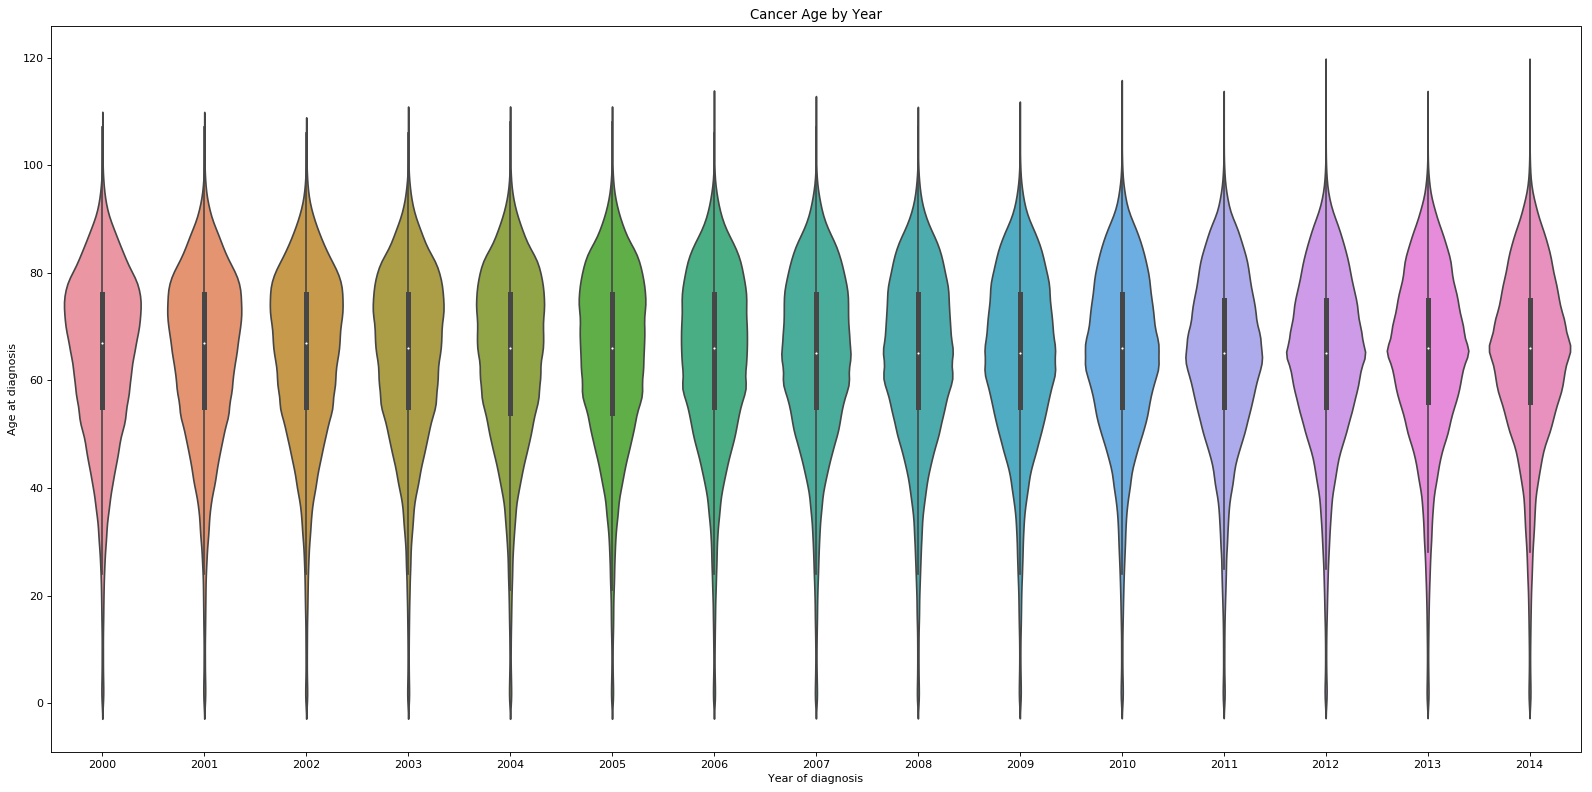

In [14]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Cancer Age by Year')
# sns.barplot(x='Superfund Sites', y='County', data=d, palette='Blues_d')
sns.violinplot(x='Year of diagnosis', y='Age at diagnosis', data=d)
plt.tight_layout()


In [23]:
d1 = d.groupby(['Year of diagnosis','Sex'])['CS Schema v0204+'].count().reset_index()
d1.columns = ['Year of diagnosis','Sex','Count']
d1.head()

,Year of diagnosis,Sex,Count
0,2000,1,71678
1,2000,2,74250
2,2001,1,74639
3,2001,2,75869
4,2002,1,75416


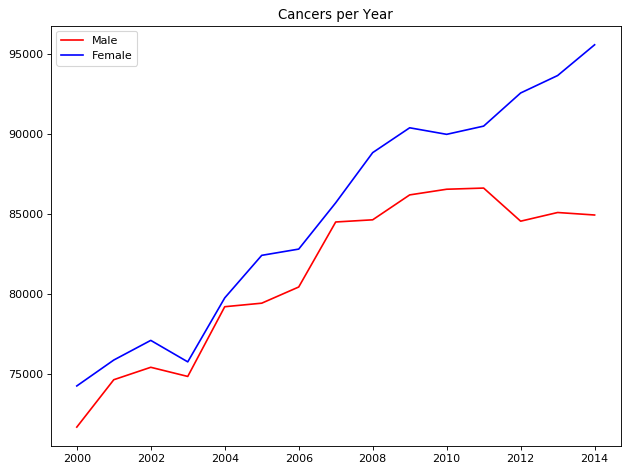

In [46]:
dmale = d1[d1['Sex'] == 1]
dfemale = d1[d1['Sex'] == 2]
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Cancers per Year')
plt.plot('Year of diagnosis','Count',data=dmale,c='red',label='Male')
plt.plot('Year of diagnosis','Count',data=dfemale,c='blue',label='Female')
plt.legend(loc='upper left')
plt.tight_layout()

In [48]:
d2 = df.groupby(['Year','Sex'])['Rate'].mean().reset_index()
d2.columns = ['Year of diagnosis','Sex','mean']
d2.head()

,Year of diagnosis,Sex,mean
0,2000,1,0.009103
1,2000,2,0.007364
2,2001,1,0.007775
3,2001,2,0.006273
4,2002,1,0.008677


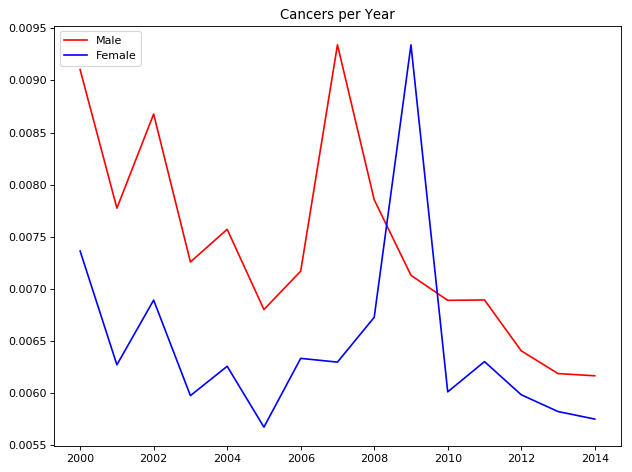

In [49]:
d2male = d2[d2['Sex'] == 1]
d2female = d2[d2['Sex'] == 2]
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Cancers per Year')
plt.plot('Year of diagnosis','mean',data=d2male,c='red',label='Male')
plt.plot('Year of diagnosis','mean',data=d2female,c='blue',label='Female')
plt.legend(loc='upper left')
plt.tight_layout()

In [95]:
df[df['Population'] == 1]

,Sex,Age,C Fips,Race,Year,Count,Population,Rate
5487,1,2,91,2,2007,1,1,1.0
11740,2,2,105,2,2009,1,1,1.0


In [53]:
d3 = d.groupby(['Year of diagnosis','Sex'])['Age at diagnosis'].mean().reset_index()
d3.columns = ['Year of diagnosis','Sex','Age']
d3.head()

,Year of diagnosis,Sex,Age
0,2000,1,65.689626
1,2000,2,63.516620
2,2001,1,65.675384
3,2001,2,63.544715
4,2002,1,65.619882


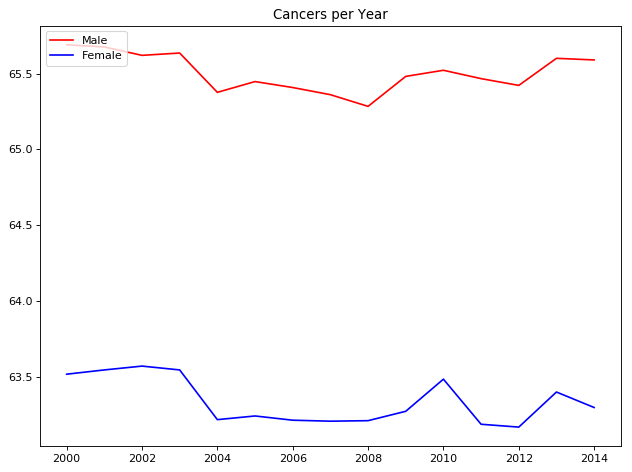

In [54]:
d3male = d3[d3['Sex'] == 1]
d3female = d3[d3['Sex'] == 2]
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Cancers per Year')
plt.plot('Year of diagnosis','Age',data=d3male,c='red',label='Male')
plt.plot('Year of diagnosis','Age',data=d3female,c='blue',label='Female')
plt.legend(loc='upper left')
plt.tight_layout()

In [62]:
d4 = d.groupby(['Year of diagnosis','CS Schema v0204+'])['Age at diagnosis'].count().reset_index()
d4.columns = ['Year of diagnosis','Cancer Type','Count']
print(d4.head())
print(d4.shape)
print(d4.tail())

   Year of diagnosis  Cancer Type  Count
0               2000            1      8
1               2000            2     85
2               2000            3    198
3               2000            4    603
4               2000            5    147
(1947, 3)
      Year of diagnosis  Cancer Type  Count
1942               2014          149     16
1943               2014          150     74
1944               2014          151     64
1945               2014          152    225
1946               2014          153    879


In [63]:
max(d4['Count'])

31602

In [64]:
d4[d4['Count']==31602]

,Year of diagnosis,Cancer Type,Count
1694,2013,13,31602


In [65]:
min(d4['Count'])

1

In [69]:
d4[d4['Count']==1].shape

(96, 3)

In [90]:
d5 = d.groupby(['CS Schema v0204+'])['Age at diagnosis'].count().reset_index()
d5.columns = ['Cancer Type','Count']
d5.sort_values('Count', ascending=False, inplace=True)
d5.head(15)

,Cancer Type,Count
12,13,427779
123,129,305208
62,63,259364
90,95,169607
17,18,156333
63,64,105712
45,46,99847
9,10,94300
50,51,65099
20,21,63378


In [91]:
topc = ['Breast','Prostate','Lung','MelanomaSkin','Colon',
'Lymphoma','HemeRetic','Bladder','KidneyParenchyma','CorpusCarcinoma',
'Brain','Rectum','Thyroid','IllDefinedOther','Liver']
topn = d5['Count'][:15]
dfcancer = pd.DataFrame(topc,topn).reset_index()
dfcancer.columns = ['Count','Type']
dfcancer

,Count,Type
0,427779,Breast
1,305208,Prostate
2,259364,Lung
3,169607,MelanomaSkin
4,156333,Colon
5,105712,Lymphoma
6,99847,HemeRetic
7,94300,Bladder
8,65099,KidneyParenchyma
9,63378,CorpusCarcinoma


/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


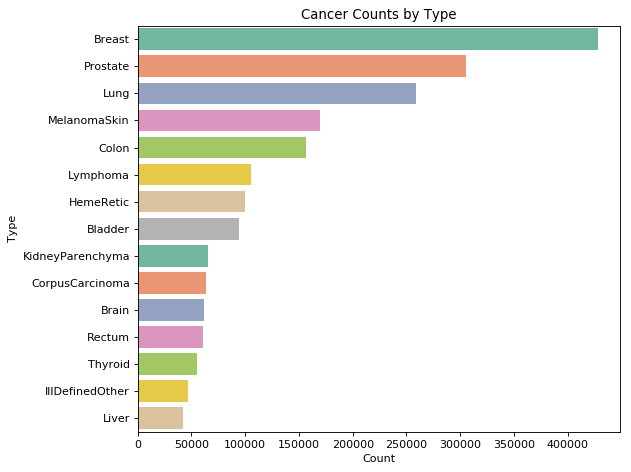

In [94]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Cancer Counts by Type')
sns.barplot(x='Count', y='Type', data=dfcancer, palette='Set2')
plt.tight_layout()